In [ ]:
# Работа с массивами данных
import numpy as np 

# Работа с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils, models

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation 

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.callbacks import ModelCheckpoint

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Отрисовка графиков
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Чтение файла базы данных
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_dataset_KURSK.csv', index_col=0)

print(df.shape)

df.head(20)

(2000, 4)


,Текст Сообщения,Тематика,Ответственное лицо,Категория
id,,,,
2246,Помогите начальник Льговского рэс не реагирует...,"Нарушения, связанные с содержанием электросети...",Администрация Льговского района,3
380,<p>По фасаду дома по адресу ул. Урицкого 22 пр...,Аварийные деревья,Администрация города Курска,3
2240,Агресивные собаки. На радуге там стая из подро...,Безнадзорные животные,Администрация города Курска,1
596,<p>На пересечении &nbsp;улиц Сосновская и Бере...,Нескошенная сорная растительность в местах общ...,Комитет дорожного хозяйства города Курска,3
1797,<p style=`text-align:justify;`><span style=`ba...,Аварийные деревья,Комитет городского хозяйства города Курска,3
1383,<p>Добрый день! Управляющая Компания “Аврора +...,Несвоевременная очистка дворовой территории мн...,Комитет жилищно-коммунального хозяйства города...,3
1934,"Добрый день, полностью отсутствует наружнее ос...",Неработающее наружное освещение,Администрация города Курска,3
2833,Едкий и вредный для здоровья запах от карьеров...,Неприятные запахи,Комитет природных ресурсов Курской области,16
1263,<p>Отсутствие люка</p>,Отсутствие люков на коммуникационных колодцах,Муниципальное казенное учреждение «Городская и...,3


In [ ]:
# Чтение файла базы данных
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_dataset_KURSK.csv', index_col=0)

#
print(df_test.shape)
df_test.head()

(1000, 3)


,Текст Сообщения,Тематика,Ответственное лицо
id,,,
843,<p>Здравствуйте. На улице Мира &nbsp;было заме...,Неработающее наружное освещение,Администрация Курчатовского района
1422,<p>Уже вторую неделю не горит уличное освещени...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...
2782,Не работает освещение во дворе дома 11а по Эне...,Неработающее наружное освещение,Комитет жилищно-коммунального хозяйства города...
2704,После покоса сорной растительности на газоне м...,Неудовлетворительная уборка улиц и тротуаров,Администрация Центрального округа города Курска
1,<p>Прошу принять меры к водителю маршрута 263:...,Неудовлетворительный внешний вид (поведение) в...,Администрация города Курска


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2246 to 1185
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Текст Сообщения     2000 non-null   object
 1   Тематика            2000 non-null   object
 2   Ответственное лицо  2000 non-null   object
 3   Категория           2000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 78.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 843 to 2567
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Текст Сообщения     1000 non-null   object
 1   Тематика            1000 non-null   object
 2   Ответственное лицо  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [ ]:
df.Категория.value_counts()

3     954
0     478
16    149
8     139
4     108
10     48
7      27
1      25
11     19
5      12
13     11
6      10
15      7
9       5
14      4
2       3
12      1
Name: Категория, dtype: int64

In [ ]:
df_test.Тематика.value_counts()

Нарушение дорожного покрытия (ямы)  на дорогах в границах городских округов и сельских поселений    77
Неработающее наружное освещение                                                                     54
Аварийные деревья                                                                                   54
Неудовлетворительная уборка улиц и тротуаров                                                        38
Несанкционированные свалки твёрдых бытовых отходов                                                  38
                                                                                                    ..
Проблемы с записью на вакцинацию                                                                     1
Несанкционированный сброс жидких бытовых отходов                                                     1
Нарушения в вопросах оплаты коммунальных услуг                                                       1
Несвоевременная выплата заработной платы                                 

In [ ]:
values = df['Тематика'].value_counts().keys().tolist()
print(values)

['Нарушение дорожного покрытия (ямы)  на дорогах в границах городских округов и сельских поселений', 'Неработающее наружное освещение', 'Отсутствие люков на коммуникационных колодцах', 'Несанкционированные свалки твёрдых бытовых отходов', 'Аварийные деревья', 'Нарушение теплоснабжения многоквартирного дома', 'Некачественное водоснабжение многоквартирного дома', 'Неудовлетворительная уборка улиц и тротуаров', 'Не соответствующий установленным нормам сбор и вывоз твёрдых бытовых отходов в районах многоквартирных домов', 'Неприятные запахи', 'Очистка от снега и наледи дорог в границах городских округов и сельских поселений', 'Отсутствие твёрдого дорожного покрытия на дорогах в границах городских округов и сельских поселений', 'Парковки на дорогах в границах городских округов и сельских поселений', 'Пешеходные переходы на дорогах в границах городских округов и сельских поселений', 'Светофоры на дорогах в границах городских округов и сельских поселений', 'Нарушения в вопросах назначения и в

In [ ]:
#  Уберем категории с количеством записей меньше 10
for cls in [15, 9, 14, 2, 12]:
  df = df.loc[df['Категория'] != cls]

In [ ]:
df.Категория.unique()

array([ 3,  1, 16,  0,  6,  8,  4, 13, 10, 11,  7,  5])

In [ ]:
# для получения последовательного списка меток от 0 до 11
df.loc[(df.Категория == 13), 'Категория'] = 9  # заменили категорию 13 на 9 
df.loc[(df.Категория == 16), 'Категория'] = 2  # заменили категорию 16 на 2


In [ ]:
df.Категория.unique()

array([ 3,  1,  2,  0,  6,  8,  4,  9, 10, 11,  7,  5])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 2246 to 1185
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Текст Сообщения     1980 non-null   object
 1   Тематика            1980 non-null   object
 2   Ответственное лицо  1980 non-null   object
 3   Категория           1980 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 77.3+ KB


In [ ]:
df.Тематика.value_counts()

Нарушение дорожного покрытия (ямы)  на дорогах в границах городских округов и сельских поселений                 155
Неработающее наружное освещение                                                                                  108
Отсутствие люков на коммуникационных колодцах                                                                     90
Несанкционированные свалки твёрдых бытовых отходов                                                                85
Аварийные деревья                                                                                                 79
                                                                                                                ... 
Вопросы оказания помощи беженцам                                                                                   1
Неудовлетворительный внешний вид (поведение) водителя при осуществлении муниципальных (пригородных) перевозок      1
Нарушение сроков реализации товара, оказания услуг              

In [ ]:
print(df.values[0])

['Помогите начальник Льговского рэс не реагирует на жалобы, а мы как малейший ветер сидим без света, а именно в деревне большие угоны улица старая слобода. Пожалуйста помогите, пускай вычистит и фотоотчет сделает'
 'Нарушения, связанные с содержанием электросети и качеством энергоснабжения в районе частного сектора'
 'Администрация Льговского района' 3]


In [ ]:
df['Ответственное лицо'].value_counts()

Администрация города Курска                                          419
Комитет дорожного хозяйства города Курска                            215
Комитет жилищно-коммунального хозяйства города Курска                171
Государственная жилищная инспекция Курской области                   151
Комитет городского хозяйства города Курска                           125
                                                                    ... 
Комитет цифрового развития и связи Курской области                     1
Администрация Тимского района                                          1
ООО `УК `Северный дом`                                                 1
МКУ «Управление по делам ГО и ЧС при Администрации города Курска»      1
Комитет внутренней политики Администрации Курской области              1
Name: Ответственное лицо, Length: 75, dtype: int64

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE       = 2000                  # Объем словаря для токенизатора

CLASS_COUNT = df.Категория.nunique()
print(CLASS_COUNT)

12


In [ ]:
import re
pattern = '[a-z]+'
def purify(x):
    # Замена концов строк на пробелы, удаление латинских букв
        
    x = x.replace('\n', ' ').replace('“', ' ').replace('”', ' ').replace('здравствуйте', '').replace('добрый день','')
    x1 = re.sub(pattern, '', x, count=0)
    return x1

ДЛя разделения исходных данных на тестовую и тренировочную выборки более рационально было бы использовать tran_test_split.  Но так как в ходе работы пробовались разные варианты, в частности, к тренировочной выборке добавлялись слова из Тематики, то тестовая выборка бралась как написано ниже.  И код получился длиннее.

In [ ]:
# тестовая выборка для проверки (возьмем первые 300 строк)
df_test1 = pd.DataFrame(df.values[:300], columns=['Текст Сообщения', 'Тематика', 'Ответственное лицо', 'Категория']) #, 'new_theme']) 

print(df_test1.Категория.value_counts())

3     161
0      62
2      22
8      18
4      14
1       4
10      4
11      4
7       4
9       3
6       2
5       2
Name: Категория, dtype: int64


In [ ]:
#  тренировочная выборка
df1 = pd.DataFrame(df.values[300:], columns=['Текст Сообщения', 'Тематика', 'Ответственное лицо', 'Категория']) 
df1['text'] = df1['Текст Сообщения'].astype(str)
print(df1.Категория.value_counts())

3     793
0     416
2     127
8     121
4      94
10     44
7      23
1      21
11     15
5      10
9       8
6       8
Name: Категория, dtype: int64


In [ ]:
df_text = df1['text'].tolist()  # тренировочная выборка 
print(len(df_text))
df_text_test1 = df_test1['Текст Сообщения'].tolist() # тестовая выборка
print(len(df_text_test1))


1680
300


In [ ]:
# предварительная обработка текста
from string import punctuation

def remove_punctuation(my_string):
  return "".join([ch if ch not in punctuation else " " for ch in my_string])

res = remove_punctuation(df_text[0])

def remove_numbers(my_string):
  return "".join([i if not i.isdigit() else " " for i in my_string])

import re
def remove_multiple_spaces(my_string):
  return re.sub(r'\s+', ' ', my_string, flags=re.I)

preprocessing = lambda text: (purify(remove_multiple_spaces(remove_numbers(remove_punctuation(text.lower())))))

text_processed = ['']

df1['text_processed'] = list(map(preprocessing, df_text))
df_test1['text_processed'] = list(map(preprocessing, df_text_test1))
df1.head(10)
    

,Текст Сообщения,Тематика,Ответственное лицо,Категория,text,text_processed
0,Тротуар по четной стороне ул. Студенческой на ...,Ямы и выбоины на тротуарах,Администрация города Курска,3,Тротуар по четной стороне ул. Студенческой на ...,тротуар по четной стороне ул студенческой на о...
1,<p>Была опубликованна статья в газете что буде...,Освещение дорог в границах городских округов и...,Администрация города Льгов,0,<p>Была опубликованна статья в газете что буде...,была опубликованна статья в газете что будет...
2,<p>За всю зиму ни разу нормально не почистили ...,Некачественная уборка дворовой территории мног...,Комитет жилищно-коммунального хозяйства города...,3,<p>За всю зиму ни разу нормально не почистили ...,за всю зиму ни разу нормально не почистили д...
3,<p>Прошу Вас провести брендирование троллейбус...,Неудовлетворительное санитарное состояние тран...,Администрация города Курска,8,<p>Прошу Вас провести брендирование троллейбус...,прошу вас провести брендирование троллейбусо...
4,Пешеходный переход: нет дорожной разметки с те...,Пешеходные переходы на дорогах в границах горо...,Комитет дорожного хозяйства города Курска,0,Пешеходный переход: нет дорожной разметки с те...,пешеходный переход нет дорожной разметки с тех...
5,<p>Упал ствол дерева. Приехали люди попилили и...,Некачественная уборка дворовой территории мног...,Комитет жилищно-коммунального хозяйства города...,3,<p>Упал ствол дерева. Приехали люди попилили и...,упал ствол дерева приехали люди попилили и о...
6,"<p>Здравствуйте! Снова, уже 3-й или 4-й раз за...",Некачественное водоснабжение в районе частного...,Администрация Обоянского района,3,"<p>Здравствуйте! Снова, уже 3-й или 4-й раз за...",снова уже й или й раз за этот месяц сидим б...
7,"Уважаемые ответственные лица, на участке улицы...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация города Курска,0,"Уважаемые ответственные лица, на участке улицы...",уважаемые ответственные лица на участке улицы ...
8,"Добрый день, п. Кшенский, ул. Пролетарская, по...",Нарушение дорожного покрытия (ямы) на дорогах...,Администрация Советского района,0,"Добрый день, п. Кшенский, ул. Пролетарская, по...",п кшенский ул пролетарская полностью разбита ...
9,На выезде с прилегающей территории между домом...,Дорожные знаки на дорогах в границах городских...,Администрация города Курска,0,На выезде с прилегающей территории между домом...,на выезде с прилегающей территории между домом...


In [ ]:
!pip install pymorphy2
!pip install pymorphy2-dict
!pip install DAWG-Python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 8.2 MB 12.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pymorphy2-dict (from versions: none)
ERROR: No matching distribution found for pymorphy2-dict
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from tqdm.auto import tqdm, trange
import pymorphy2
nltk.download('stopwords')
nltk.download('punkt')
morph = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

# лемматизация тренировочной выборки
lemm_texts_column = [ ]
for text in tqdm(df1['text_processed']):
  tokens = word_tokenize(text)
  lemmed_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
  text = " ".join(lemmed_tokens)
  lemm_texts_column.append(text)
#  создаем новую колонку
df1["text_lemmed"] = lemm_texts_column

# лемматизация тестовой выборки в исходных данных
lemm_texts_column = [ ]
for text in tqdm(df_test1['text_processed']):
  tokens = word_tokenize(text)
  lemmed_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
  text = " ".join(lemmed_tokens)
  lemm_texts_column.append(text)
#  создаем новую колонку
df_test1["text_lemmed"] = lemm_texts_column


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
# Извлечение тренировочных записей и их меток классов
text_data = df1['text_lemmed'].tolist()
class_labels = df1['Категория'].tolist()
print(len(text_data))
print(len(class_labels))
print(class_labels[:10])
# Извлечение тестовых записей и их меток классов
test_data = df_test1['text_lemmed'].tolist()
test_class_labels = df_test1['Категория'].tolist()


1680
1680
[3, 0, 3, 8, 0, 3, 3, 0, 0, 0]


In [ ]:
# Преобразование меток класса к векторам one hot encoding
y_train = utils.to_categorical(class_labels, 12)
y_test = utils.to_categorical(test_class_labels, 12)
# Вывод формы и примера данных
print(y_train.shape)
print(y_test[0])

(1680, 12)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

# Построение частотного словаря по обучающим текстам
tokenizer.fit_on_texts(text_data+test_data)

# Построение словаря в виде пар слово - индекс
items = list(tokenizer.word_index.items())

In [ ]:
print(items[2800:])

[('преодолеть', 2801), ('ямка', 2802), ('внутренний', 2803), ('колледж', 2804), ('будить', 2805), ('доп', 2806), ('ручей', 2807), ('подчинённый', 2808), ('интересоваться', 2809), ('кошка', 2810), ('лучистый', 2811), ('поспособствовать', 2812), ('стирать', 2813), ('подключать', 2814), ('щебёнка', 2815), ('закрытие', 2816), ('освободить', 2817), ('ра', 2818), ('санкционировать', 2819), ('писаться', 2820), ('снегоуборочный', 2821), ('доставать', 2822), ('трагедия', 2823), ('соль', 2824), ('устный', 2825), ('остро', 2826), ('аргументировать', 2827), ('гнилой', 2828), ('воспользоваться', 2829), ('компетенция', 2830), ('уволиться', 2831), ('открываться', 2832), ('сосновский', 2833), ('самочувствие', 2834), ('покидать', 2835), ('наказать', 2836), ('переломать', 2837), ('член', 2838), ('создание', 2839), ('ссылка', 2840), ('подход', 2841), ('нарушитель', 2842), ('отведение', 2843), ('заместитель', 2844), ('массаж', 2845), ('диск', 2846), ('разрыв', 2847), ('инспектор', 2848), ('возмещение', 28

In [ ]:
# Преобразование входных текстов в последовательности индексов для архитектуры с embedding(удалена из данной версии)
x_data = np.array(tokenizer.texts_to_sequences(text_data), dtype=object)
# Вывод формы и примера данных
print(x_data.shape) 
print(x_data[0][:20])

# Преобразование входных текстов в разреженную матрицу из векторов Bag of Words
x_train_01 = tokenizer.texts_to_matrix(text_data)
# Вывод формы и примера данных
print(x_train_01.shape) 
print(x_train_01[0, :20])

# Преобразование тестовых сообщений в разреженную матрицу из векторов Bag of Words
x_test_01 = tokenizer.texts_to_matrix(test_data)
# Вывод формы и примера данных
print(x_test_01.shape) 
print(x_test_01[0, :20])

(1680,)
[33, 1759, 48, 8, 853, 1127, 21, 319, 49]
(1680, 2000)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300, 2000)
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
class_labels_list = [0,1,2,3,4,5,6,7,8,9,10,11]

In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        callbacks=[checkpoint_callback])

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=class_labels_list,
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)
    print(cm)
    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels_list)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')
    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))
# Для каждого класса:
    for cls in range(12):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(cls,
                                                                               100. * cm[cls, cls_pred],
                                                                              class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=class_labels_list,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=32,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels_list, 
               title=title,
               figsize=cm_size)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_382 (Dense)           (None, 4000)              8004000   
                                                                 
 batch_normalization_316 (Ba  (None, 4000)             16000     
 tchNormalization)                                               
                                                                 
 dense_383 (Dense)           (None, 2000)              8002000   
                                                                 
 batch_normalization_317 (Ba  (None, 2000)             8000      
 tchNormalization)                                               
                                                                 
 dense_384 (Dense)           (None, 1000)              2001000   
                                                                 
 batch_normalization_318 (Ba  (None, 1000)           

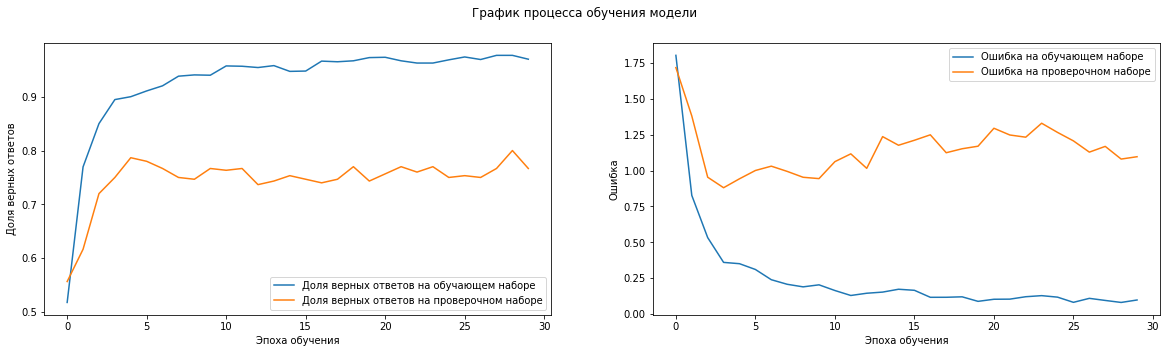

[[0.694 0.    0.    0.242 0.032 0.    0.    0.    0.016 0.    0.    0.016]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.682 0.318 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.093 0.    0.043 0.863 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.071 0.929 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.5   0.    0.    0.    0.5   0.    0.    0.    0.   ]
 [0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.   ]
 [0.    0.    0.    0.75  0.25  0.    0.    0.    0.    0.    0.    0.   ]
 [0.056 0.    0.056 0.111 0.    0.    0.    0.    0.778 0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.5   0.    0.    0.    0.    0.    0.    0.5   0.   ]
 [0.25  0.25  0.25  0.25  0.    0.    0.    0.    0.    0.    0.    0.   ]]


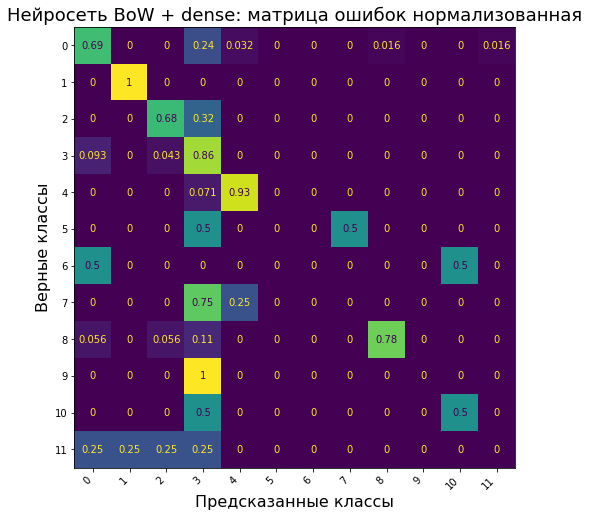

----------------------------------------------------------------------------------------------------
Нейросеть: BoW + dense

Средняя точность распознавания:  45%
Класс: 0                     69% сеть отнесла к классу 0                    - ВЕРНО :-)
Класс: 1                    100% сеть отнесла к классу 1                    - ВЕРНО :-)
Класс: 2                     68% сеть отнесла к классу 2                    - ВЕРНО :-)
Класс: 3                     86% сеть отнесла к классу 3                    - ВЕРНО :-)
Класс: 4                     93% сеть отнесла к классу 4                    - ВЕРНО :-)
Класс: 5                     50% сеть отнесла к классу 3                    - НЕВЕРНО :-(
Класс: 6                     50% сеть отнесла к классу 0                    - НЕВЕРНО :-(
Класс: 7                     75% сеть отнесла к классу 3                    - НЕВЕРНО :-(
Класс: 8                     78% сеть отнесла к классу 8                    - ВЕРНО :-)
Класс: 9                    100% сеть от

In [ ]:
# Последовательная модель
model = Sequential()
# Входной полносвязный слой
model.add(Dense(4000, input_dim=VOCAB_SIZE, activation="relu"))
model.add(BatchNormalization())

# Второй полносвязный слой
model.add(Dense(2000, activation='relu'))
model.add(BatchNormalization())

# Третий полносвязный слой
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())

#model.add(Dense(1000, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())

#model.add(Dense(200, activation='relu'))
#model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())

# Выходной полносвязный слой
model.add(Dense(12, activation='softmax'))

model_save_path = '/content/model_16.h5' 
checkpoint_callback = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, verbose=1)
# Входные данные подаются в виде векторов bag of words

compile_train_eval_model(model,
                         x_train_01, y_train,
                         x_test_01, y_test,
                         epochs=30,
                         batch_size=14,
                         cm_size=(9, 9),
                         class_labels=class_labels_list,
                         title='BoW + dense')

In [ ]:
model = models.load_model('/content/model_16.h5')  # загружаем сохраненную модель с  val_accuracy=0.80

[[0.726 0.    0.032 0.194 0.    0.    0.    0.    0.032 0.    0.    0.016]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.636 0.364 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.081 0.    0.019 0.894 0.    0.    0.    0.    0.006 0.    0.    0.   ]
 [0.    0.    0.    0.071 0.929 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.5   0.    0.    0.    0.5   0.    0.    0.    0.   ]
 [0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.   ]
 [0.25  0.    0.    0.5   0.    0.    0.    0.25  0.    0.    0.    0.   ]
 [0.    0.    0.    0.056 0.    0.    0.    0.    0.944 0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.5   0.    0.    0.    0.    0.    0.    0.5   0.   ]
 [0.25  0.25  0.    0.5   0.    0.    0.    0.    0.    0.    0.    0.   ]]


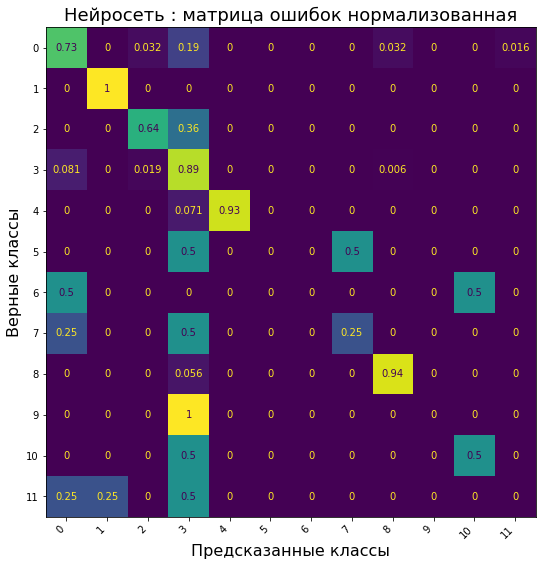

----------------------------------------------------------------------------------------------------
Нейросеть: 

Средняя точность распознавания:  49%
Класс: 0                     73% сеть отнесла к классу 0                    - ВЕРНО :-)
Класс: 1                    100% сеть отнесла к классу 1                    - ВЕРНО :-)
Класс: 2                     64% сеть отнесла к классу 2                    - ВЕРНО :-)
Класс: 3                     89% сеть отнесла к классу 3                    - ВЕРНО :-)
Класс: 4                     93% сеть отнесла к классу 4                    - ВЕРНО :-)
Класс: 5                     50% сеть отнесла к классу 3                    - НЕВЕРНО :-(
Класс: 6                     50% сеть отнесла к классу 0                    - НЕВЕРНО :-(
Класс: 7                     50% сеть отнесла к классу 3                    - НЕВЕРНО :-(
Класс: 8                     94% сеть отнесла к классу 8                    - ВЕРНО :-)
Класс: 9                    100% сеть отнесла к кла

In [ ]:
# Функция вывода результатов оценки сохраненной модели
eval_model(model, x_test_01, y_test,
               class_labels=class_labels_list,
               cm_round=3,
               title='',
               figsize=(10, 10))
    

In [ ]:
text_data_test = df_test['Текст Сообщения'].tolist()  # тестовый набор данных

In [ ]:
df_test['text_processed'] = list(map(preprocessing, text_data_test))

# лемматизация тестового набора
lemm_texts_column = [ ]
for text in tqdm(df_test['text_processed']):
  tokens = word_tokenize(text)
  lemmed_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in russian_stopwords]
  text = " ".join(lemmed_tokens)
  lemm_texts_column.append(text)
#  создаем новую колонку
df_test["text_lemmed"] = lemm_texts_column

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
test_text = df_test['text_lemmed'].tolist()


In [ ]:
test_text[:20]

['улица мир заменить наружное освещение именно заменить лампа энергосберегающий лампа протяжение несколько месяц освещение улица отсутствовать последний улица осветить это зима приблизительно каждый день человек работать часовой смена многие возвращаться очень поздно дать проблема улица посёлок',
 'второй неделя гореть уличный освещение',
 'работать освещение двор дом энергетик световой опора',
 'покос сорный растительность газон тротуар проезжий часть проезд улица студенческий проспект дружба район дом № проспект дружба выявить значительный количество мусор просить произвести уборка',
 'просить принять мера водитель маршрут пос северный союзный автобус г н м ом салон автобус постоянно накурить число сегодня особенно конечный остановка видимо водитель курить салон ехать невозможно особенно ребёнок кроме салон грязно ощущение автобус мыть целый год',
 'просить создать остановочный пункт викторовка проезжий часть человек очень долго идти рядом жд ветка',
 'мусор га контейнерный площадка'

In [ ]:
# Преобразование тестовых текстов в разреженную матрицу из векторов Bag of Words
x_data_test = tokenizer.texts_to_matrix(test_text)
# Вывод формы и примера данных
print(x_data_test.shape) 
print(x_data_test[0, :20])            
  

(1000, 2000)
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
model = models.load_model('/content/model_16.h5')

In [ ]:
y_pred = model.predict(x_data_test)  #  предсказание на тестовом наборе
print(y_pred.shape)
y = np.argmax(y_pred, axis=1)
print(y.shape)
print(y[:10])


(1000, 12)
(1000,)
[3 3 3 3 8 3 3 3 3 4]


In [ ]:
# делаем обратные преобразования меток: заменим 2 на 16, 9 на 13
for i in range(1000):
  if y[i] == 2:
    y[i] = 16
  if y[i] == 9:
    y[i] = 13
  
  

In [ ]:
DF_result = pd.DataFrame(y)
DF_result.index = df_test.index
DF_result.columns = ['Категория']
DF_result.head()

,Категория
id,
843,3
1422,3
2782,3
2704,3
1,8


In [ ]:
DF_result.to_csv("Kursk_prediction16.csv")

In [ ]:
model.save('my_model_var_16.h5')    # сохраним модель

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/my_model_var_16.h5') # сохранение модели на диске